In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression   
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.impute import SimpleImputer, KNNImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df = pd.read_csv('dataset/convert_number_data_17.csv')


In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accelerationTime         26304 non-null  float64
 1   bodyType                 26304 non-null  int64  
 2   brand                    26304 non-null  int64  
 3   cargoVolume              26304 non-null  float64
 4   curbWeight               26304 non-null  float64
 5   driveWheelConfiguration  26304 non-null  int64  
 6   eLabel                   26304 non-null  int64  
 7   emissionsCO2             26304 non-null  float64
 8   engineCapacity           26304 non-null  float64
 9   fuelCapacity             26304 non-null  float64
 10  fuelConsumption          26304 non-null  float64
 11  height                   26304 non-null  float64
 12  length                   26304 non-null  float64
 13  model                    26304 non-null  int64  
 14  modelDate             

In [4]:
df = df.select_dtypes(exclude=['int64'])

df.info(verbose=True)

X = df.drop('price', axis=1)
# price column
y = np.log(df['price'])
# y = df['price']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accelerationTime      26304 non-null  float64
 1   cargoVolume           26304 non-null  float64
 2   curbWeight            26304 non-null  float64
 3   emissionsCO2          26304 non-null  float64
 4   engineCapacity        26304 non-null  float64
 5   fuelCapacity          26304 non-null  float64
 6   fuelConsumption       26304 non-null  float64
 7   height                26304 non-null  float64
 8   length                26304 non-null  float64
 9   payload               26304 non-null  float64
 10  price                 26304 non-null  float64
 11  roofLoad              26304 non-null  float64
 12  seatingCapacity       26304 non-null  float64
 13  speed                 26304 non-null  float64
 14  torque                26304 non-null  float64
 15  vEengineDisplacemen

In [5]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [6]:
# feature scale the X_train and X_test values

norm = StandardScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing data
X_test = norm.transform(X_test)

print(X_train)
print('\n')
print(X_test)

[[ 0.32145518  0.27841913  0.74512226 ...  1.26919549 -0.0994536
   1.60347686]
 [ 1.80975926 -1.0682918  -0.69601444 ... -0.81816958 -0.80713797
  -1.04255702]
 [-1.75433735  0.26027691  1.6422806  ...  1.59281798  1.21941272
   1.70359706]
 ...
 [ 0.43895287  0.36913023  0.35946596 ...  0.54104489  1.05857536
   0.38773157]
 [-0.69685814  0.23655247  0.98869466 ...  0.39541476  0.22222111
   0.08737096]
 [-0.69685814  0.49473021  1.49207762 ...  1.43100674  0.897738
   1.11717874]]


[[ 0.1256257   0.38308578 -0.49303744 ... -0.34891697  0.06138375
   0.34482291]
 [ 0.24312339 -0.2895719  -1.20345694 ... -1.2226977  -0.64630061
  -1.08546568]
 [-0.07020379 -0.02860305 -0.78938386 ... -0.44600372 -0.16378854
  -0.04135501]
 ...
 [-1.87183504 -1.01246958  1.53673256 ...  1.31773887  1.88206262
   1.10287586]
 [-0.07020379 -1.15202512  0.08747678 ...  0.00706777  0.28655605
   0.31621714]
 [ 2.08392054  2.86717434 -0.16827424 ...  0.07179227  0.70473318
   0.93124123]]


In [13]:
from sklearn.linear_model import Lasso
# lasso = Lasso(alpha=0.4)
lasso = LinearRegression()


lasso.fit(X_train, y_train)

LinearRegression()

In [8]:
# fitting knn
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [9]:

rf = RandomForestRegressor(random_state = 123 , max_depth = 45 , n_estimators = 600)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=45, n_estimators=600, random_state=123)

In [10]:
# fit decision tree
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

TRAIN SCORE

In [11]:
train_score = pd.DataFrame({
    'model': ['LinearRegressor', 'KNeighborsRegressor', 'DecisionTree', 'RandomForestRegressor'],

    'score': [lasso.score(X_train, y_train), knn.score(X_train, y_train), dtr.score(X_train, y_train), rf.score(X_train, y_train),
              ]
    })
train_score

,model,score
0,LinearRegressor,0.000000
1,KNeighborsRegressor,0.974967
2,DecisionTree,0.991746
3,RandomForestRegressor,0.989922


In [12]:
linear_pred = np.exp(lasso.predict(X_test))
knn_pred = np.exp(knn.predict(X_test))

rf_pred = np.exp(rf.predict(X_test))
dtr_pred = np.exp(dtr.predict(X_test))

y_test = np.exp(y_test)

EVALUATION TEST

In [13]:
best_model = pd.DataFrame({
  'model': ['LinearRegressor', 'KNeighborsRegressor', 'DecisionTree', 'RandomForestRegressor'],
  'mae' : [mean_absolute_error(y_test, linear_pred), mean_absolute_error(y_test, knn_pred), mean_absolute_error(y_test, dtr_pred), mean_absolute_error(y_test, rf_pred)],
  'mse' : [mean_squared_error(y_test, linear_pred), mean_squared_error(y_test, knn_pred), mean_squared_error(y_test, dtr_pred), mean_squared_error(y_test, rf_pred)],
  'rmse' : [np.sqrt(mean_squared_error(y_test, linear_pred)), np.sqrt(mean_squared_error(y_test, knn_pred)), np.sqrt(mean_squared_error(y_test, dtr_pred)), np.sqrt(mean_squared_error(y_test, rf_pred))],
  'r2_score' : [r2_score(y_test, linear_pred), r2_score(y_test, knn_pred), r2_score(y_test, dtr_pred), r2_score(y_test, rf_pred)]
  
})
best_model

,model,mae,mse,rmse,r2_score
0,LinearRegressor,12.948538,298.534354,17.278147,-0.041723
1,KNeighborsRegressor,2.575970,13.754700,3.708733,0.952004
2,DecisionTree,2.651061,14.620022,3.823614,0.948984
3,RandomForestRegressor,2.299902,10.454110,3.233282,0.963521


In [14]:
# cat boost regressor
for i in range(5):
    y = list(y_test)[i]
    y_pre = list(rf_pred)[i]
    print(f'Real price:    {y}')
    print(f'Predict price: {y_pre}\n\n')

Real price:    27.479999999999997
Predict price: 30.581961807536768


Real price:    15.189999999999998
Predict price: 16.419611209819493


Real price:    23.994999999999994
Predict price: 24.3734315144403


Real price:    41.219999999999985
Predict price: 40.812277398840244


Real price:    63.42000000000001
Predict price: 69.04282746964034




In [15]:
import matplotlib.pyplot as plt

In [16]:
def plot_result(y_pred, y_true, low=0, num=500, model=None):
    y_pred = y_pred[low:low+num]
    y_true = y_true[low:low+num]
    plt.figure(figsize=(16, 12), dpi=100)
    idx = np.array([_ for _ in range(len(y_true))])
    plt.plot(idx, y_true, label='TrueResult')
    plt.plot(idx, y_pred, label='Predict')
    plt.legend()
    if model is not None:
        plt.title(model)
    else:
        model = ""
    plt.show()
    plt.savefig(f'image/result_model_{model}.png', dpi=120)


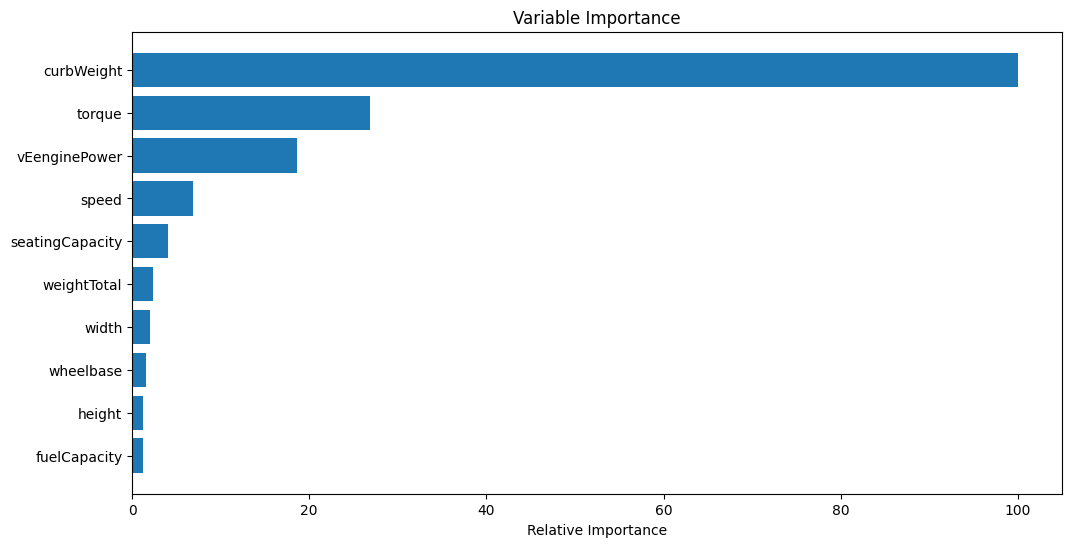

In [17]:
# fearure importance of decision tree regressor
feature_importance = dtr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[-10:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [16]:
import matplotlib.pyplot as plt 

In [14]:
def plot_result(y_pred, y_true, low=0, num=500, model=None):
    y_pred = y_pred[low:low+num]
    y_true = y_true[low:low+num]
    plt.figure(figsize=(16, 12), dpi=100)
    idx = np.array([_ for _ in range(len(y_true))])
    plt.plot(idx, y_true, label='TrueResult')
    plt.plot(idx, y_pred, label='Predict')
    plt.legend()
    if model is not None:
        plt.title(model)
    else:
        model = ""
    plt.show()
    # plt.savefig(f'image/result_model_{model}.png', dpi=120)

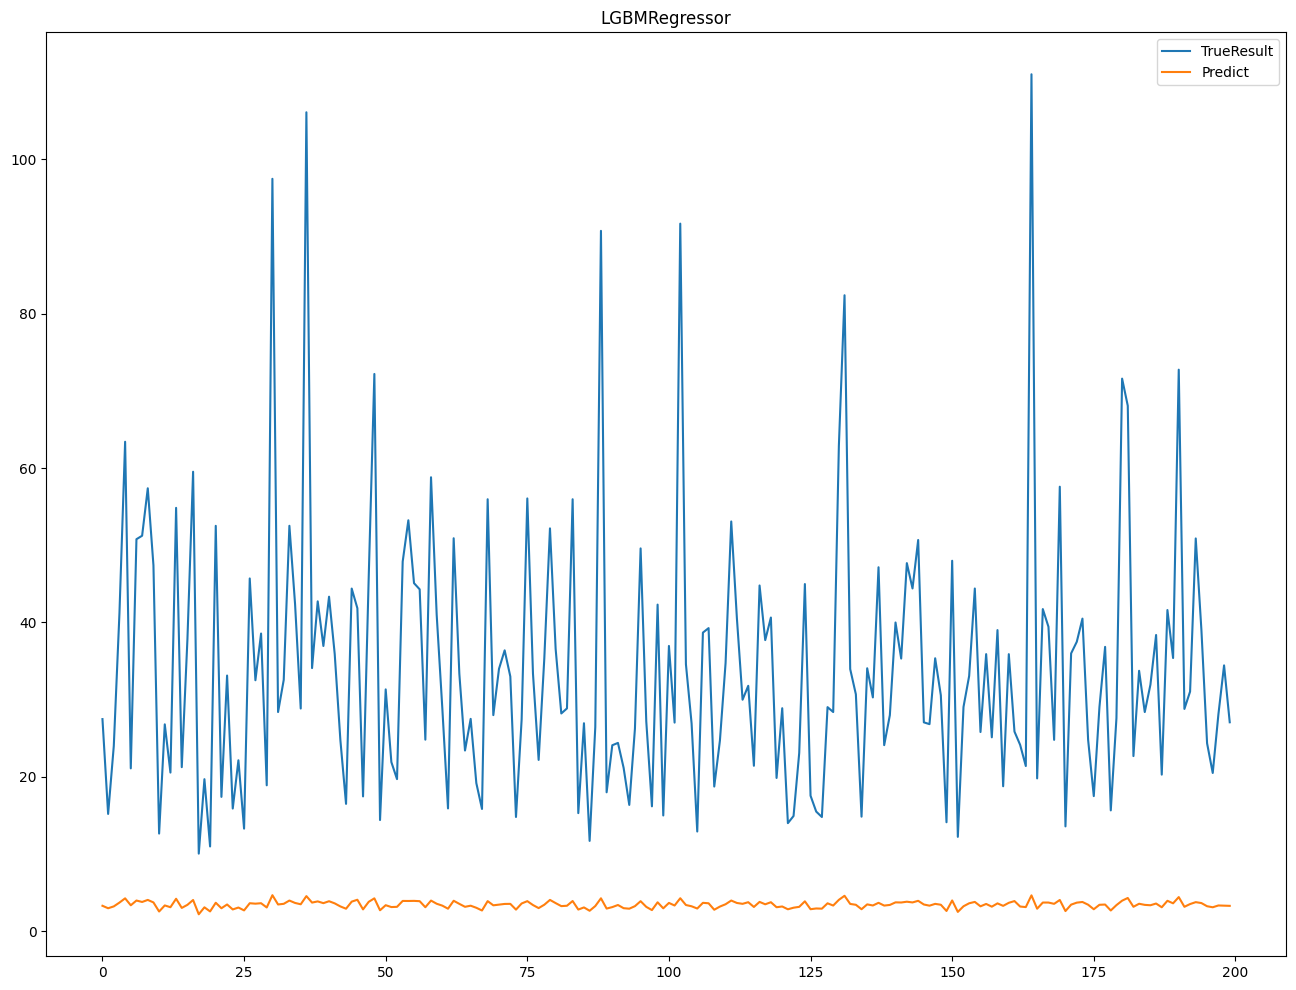

In [17]:
lasso_pred = lasso.predict(X_test)
plot_result(lasso_pred, y_test, low=0, num=200, model='LGBMRegressor')